## Regress tree midpoint split for Boston dataset

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_boston, load_iris, load_wine, load_digits, \
                             load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from sklearn import tree
from dtreeviz.trees import *
from lolviz import treeviz

In [2]:
class TreeNode: # acts as decision node and leaf. it's a leaf if split is None
  def __init__(self, split=None, prediction=None, left=None, right=None):
    self.split = split
    self.prediction = prediction
    self.left = left
    self.right = right
  def __repr__(self):
    return str(self.value)
  def __str__(self):
    return str(self.value)

In [3]:
boston = load_boston()
X = boston.data
y = boston.target
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Boston midpoint stump

In [4]:
def stumpfit(x, y):
    if len(x)==1 or len(np.unique(x))==1: # if one x value, make leaf
        return TreeNode(prediction=y[0])
    split = (min(x) + max(x)) / 2 # midpoint
    t = TreeNode(split)
    t.left = TreeNode(prediction=np.mean(y[x<split]))
    t.right = TreeNode(prediction=np.mean(y[x>=split]))
    return t

506 records


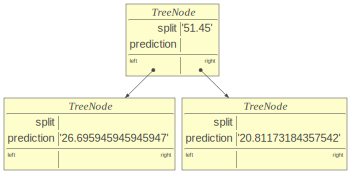

In [5]:
print(len(X), "records")
age = X[:,6]
stump = stumpfit(age,y)
treeviz(stump)

### Boston midpoint tree

In [6]:
def treefit(x, y):
    if len(x)==1 or len(np.unique(x))==1: # if one x value, make leaf
        return TreeNode(prediction=y[0])
    split = (min(x) + max(x)) / 2 # midpoint
    t = TreeNode(split)
    t.left  = treefit(x[x<split],  y[x<split])
    t.right = treefit(x[x>=split], y[x>=split])
    return t

In [7]:
root = treefit(age,y)
treeviz(root)

## Dynamic method call demo

In [8]:
class DecisionNode:
    def hello(self):
        print("woof")

class LeafNode:
    def hello(self):
        print("meow")

In [9]:
d = DecisionNode()
d.hello()
l = LeafNode()
l.hello()

woof
meow


In [10]:
def foo(x):
    x.hello()

In [11]:
foo(d)

woof


In [12]:
foo(l)

meow


## tracking return locations

In [13]:
def f():
    g()
    print("back from g()")
    
def g():
    h()
    print("back from h()")

def h():
    print("hi I'm h!")

In [14]:
f()
print("back from f()")

hi I'm h!
back from h()
back from g()
back from f()


f calls g calls h and it remembers where it came from. Just imagine that f, g, and h are the same function and you'll see that recursion also remembers where it came from.

Where to return is tracked per function **call** not per function **definition**.